In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas as gpd

idx = pd.IndexSlice

scenario = "FS"
ll = "historic"

data = pd.read_csv(
    Path.cwd().parent / 
    "results" / 
    "pypsa-fes" /
    "csvs" /
    # "flex_statistics_combined.csv",
    "flex_statistics.csv",
    index_col=[0,1],
    header=[0,1,2,3,4]
    )

data = data.loc[:, idx[ll, :, :, scenario, :]]
data.columns = data.columns.droplevel([0,1,3])

cols = data.columns.to_frame()
cols.loc[cols["flexopts"].str.contains("Unnamed"), "flexopts"] = "no flex"

data.columns = pd.MultiIndex.from_frame(cols)

data = data.loc[:, idx[["no flex", "int-tank-ss-v2g"]]]

c1 = "#FF0659"
c2 = "#008BFB"

intermittent = pd.Index(["solar", "onwind", "offwind-ac", "offwind-dc"])
conventional = pd.Index(["OCGT", "CCGT", "nuclear", "biomass", "allam"])

In [12]:
data

flexopts                             no flex                            \
year                                    2025         2030         2035   
GB0 Z10 OCGT_energy                 0.000000     0.000000     0.000000   
        CCGT_energy                 0.000000     0.000000     0.000000   
        allam_energy            10023.928759     7.137609  1838.595350   
        nuclear_energy              0.000000     0.000000     0.000000   
        modular nuclear_energy      0.000000     0.000000     0.000000   
...                                      ...          ...          ...   
GB0 Z9  OCGT_p_nom                 85.390008    98.487033    96.768848   
        CCGT_p_nom               5083.145209  5862.792382  5760.511264   
        allam_p_nom                 1.482775     0.002201     0.119287   
        nuclear_p_nom               0.000000     0.000000     0.000000   
        biomass_p_nom             412.400000   412.400000   412.400000   

flexopts                                                                   \
year                                    2040           2045          2050   
GB0 Z10 OCGT_energy                 0.000000       0.000000  0.000000e+00   
        CCGT_energy                 0.000000       0.000000  0.000000e+00   
        allam_energy            17972.932537  866486.301457  2.293072e+06   
        nuclear_energy              0.000000       0.000000  0.000000e+00   
        modular nuclear_energy      0.000000       0.000000  0.000000e+00   
...                                      ...            ...           ...   
GB0 Z9  OCGT_p_nom                 88.499682      80.492522  7.861608e+01   
        CCGT_p_nom               5268.259661    4791.604829  4.679903e+03   
        allam_p_nom                 0.334562       1.967831  1.077796e+03   
        nuclear_p_nom               0.000000       0.000000  0.000000e+00   
        biomass_p_nom             412.400000     412.400000  4.124000e+02   

flexopts                       int-tank-ss-v2g                            \
year                                      2025         2030         2035   
GB0 Z10 OCGT_energy                   0.000000     0.000000     0.000000   
        CCGT_energy                   0.000000     0.000000     0.000000   
        allam_energy                 14.255184     9.885784    10.839082   
        nuclear_energy                0.000000     0.000000     0.000000   
        modular nuclear_energy        0.000000     0.000000     0.000000   
...                                        ...          ...          ...   
GB0 Z9  OCGT_p_nom                   85.390008    98.487033    96.768848   
        CCGT_p_nom                 5083.145209  5862.792382  5760.511264   
        allam_p_nom                   0.003238     0.002600     0.002719   
        nuclear_p_nom                 0.000000     0.000000     0.000000   
        biomass_p_nom               412.400000   412.400000   412.400000   

flexopts                                                               
year                                   2040         2045         2050  
GB0 Z10 OCGT_energy                0.000000     0.000000     0.000000  
        CCGT_energy                0.000000     0.000000     0.000000  
        allam_energy            2101.252699   847.159973  1693.907573  
        nuclear_energy             0.000000     0.000000     0.000000  
        modular nuclear_energy     0.000000     0.000000     0.000000  
...                                     ...          ...          ...  
GB0 Z9  OCGT_p_nom                88.499682    80.492522    78.616080  
        CCGT_p_nom              5268.259661  4791.604829  4679.902920  
        allam_p_nom                0.076125     0.045231     0.070511  
        nuclear_p_nom              0.000000     0.000000     0.000000  
        biomass_p_nom            412.400000   412.400000   412.400000  

[459 rows x 12 columns]

In [13]:
import pypsa


base = Path.cwd().parent / "results" / "pypsa-fes" / "networks"
fn = "elec_s_ec_l{}__{}_{}_{}.nc"

def get_total_system_cost(flex, year):
    if flex == "no flex": flex = ""
    return pypsa.Network(base / fn.format(ll, flex, scenario, year)).objective


print(get_total_system_cost("", 2040))
print(get_total_system_cost("int-tank-ss-v2g", 2040))

INFO:pypsa.io:Imported network elec_s_ec_lhistoric___FS_2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


36734586764.26477


INFO:pypsa.io:Imported network elec_s_ec_lhistoric__int-tank-ss-v2g_FS_2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


33813636864.521606


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

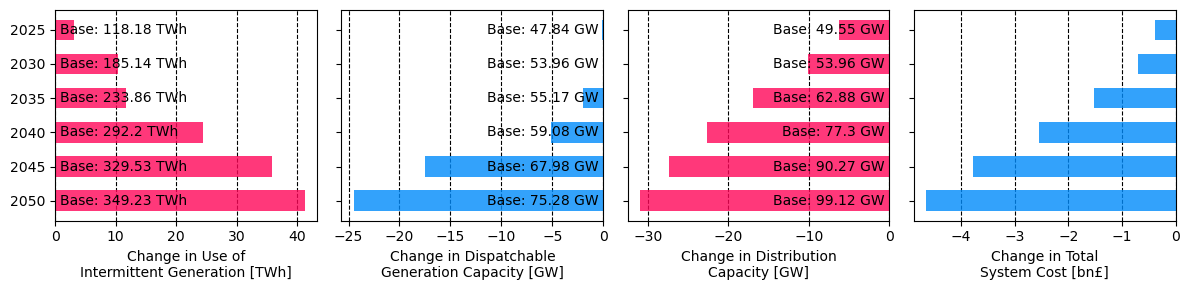

In [14]:
from itertools import cycle

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

barh_kwargs = {
    "height": 0.6,
    "alpha": 0.8,
}

indexes = {
    "int": intermittent+"_energy",
    "cap": conventional+"_p_nom",
    # "tra": "transmission_s_nom",
    "tra": "transmission_s_nom",
    "dis": "distribution_p_nom",
}

plotted_quants = ["int", "cap", "dis", "cos"]
for ax, name, color in zip(axs, plotted_quants, cycle([c1, c2])):

    df = data.groupby(level=1).sum()

    if name == 'int': fac = 1e-6
    elif name == 'cos': fac = 1e-9
    else: fac = 1e-3

    if name in ["int", "cap"]:
        df = df.loc[indexes[name]].sum()
    elif name == 'cos':
        df = df.apply(lambda x: get_total_system_cost(*x.name), axis=0).mul(1/1.15)
    else:
        df = df.loc[indexes[name]]
    
    df = df.mul(fac)

    widths = []
    ls = []
    bases = []

    for year in sorted(df.index.get_level_values(1).unique().astype(int))[::-1]:
        year = str(year)
        year_df = df.loc[idx[:, year]]

        l, r = year_df.min(), year_df.max()
        width = r - l
        widths.append(width)
        ls.append(l)
        bases.append(year_df.loc["no flex"])


    for year in sorted(df.index.get_level_values(1).unique().astype(int))[::-1]:

        year = str(year)
    
        year_df = df.loc[idx[:, year]]
        
        l, r = year_df.min(), year_df.max()
        width = r - l

        if name == "int":
            ax.barh(year, width, color=color, **barh_kwargs)
        
        else:
            ax.barh(year, -width, color=color, **barh_kwargs)


    for (i, year), w in zip(enumerate(sorted(df.index.get_level_values(1).unique().astype(int))[::-1]), widths):

        if name == "int": 
            ha = "left"
            mul = 1.
            unit = "TWh"
        elif name == "cos":
            continue
        else:
            ha = "right"
            mul = -1.
            unit = "GW"

        year = str(year)
        ax.text(
            mul * max(widths)*0.02,
            year,
            f"Base: {np.around(bases[i], decimals=2)} {unit}",
            va='center',
            ha=ha, 
            )

for ax in axs[1:]:
    ax.set_yticklabels("")

for ax in axs:
    ax.grid(axis="x", linestyle="dashed", color="k")
    ax.set_axisbelow(True)

ylabels = {
    'int': "Change in Use of\nIntermittent Generation [TWh]",
    'cap': "Change in Dispatchable\nGeneration Capacity [GW]",
    'tra': "Change in Transmission\nCapacity [GW]",
    'dis': "Change in Distribution\nCapacity [GW]",
    'cos': "Change in Total\nSystem Cost [bn£]"
}

for ax, l in zip(axs, plotted_quants):
    ax.set_xlabel(ylabels[l])

plt.tight_layout()

plt.savefig(f"whole_system_change_{ll}_{scenario}.pdf")
plt.show()